tgb - 1/8/2020 - Figures 1 and 2 from reduced data

# 0) Imports and Utilities

In [8]:
# Initial imports
import util.Landau_Potential_Diffusion as Landau
import util.curvature as curve
import util.pdf as PDF

import xarray as xr
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import matplotlib.transforms as mtransforms
import datetime
from skimage import measure
from scipy import ndimage, stats
import scipy.integrate as sin
from scipy.optimize import curve_fit
from scipy.ndimage.filters import gaussian_filter1d
import random
import pandas as pd

import pickle

In [9]:
# Figure characteristics common to all Figures
fz = 15
lw = 3
siz = 10

plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['lines.markersize'] = siz
plt.close('all')

# Physical constants
stday = 24*3600

In [10]:
pathPKL = '/users/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'

In [11]:
class Bunch(object):
  
    def __init__(self, adict):
        self.__dict__.update(adict)

In [12]:
def edgTObin(edges):
    return 0.5*(edges[1:]+edges[:-1])

In [13]:
def get_all_values(dic_values):
    values = []
    for i_k, key in enumerate(dic_values.keys()):
        values.extend(dic_values[key])
    return values

In [14]:
def find_index(time_A, time_cond):
    ind = np.where(time_A == time_cond)[0][0]
    return ind

# 1) Figure 1

In [15]:
# Load reduced data into dictionary S
path = pathPKL+'2020_01_08_COSMO_CWV.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1a = Bunch(S)

In [16]:
# Load reduced data into dictionary S
path = pathPKL+'2019_11_19_Fig1a.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1c = Bunch(S)

In [17]:
# Load reduced data into dictionary S
pathPKL = '/users/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
path = pathPKL+'2020_01_08_ERA5_CWV.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1b = Bunch(S)

In [18]:
# Load reduced data into dictionary S
pathPKL = '/users/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
path = pathPKL+'2020_01_08_ERA5_PDF.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1d = Bunch(S)

In [21]:
path = pathPKL+'2020_01_20_p88.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
P88 = Bunch(S) # Measuring the 88th percentile in COSMO simulations

In [23]:
switch_kde = False
method = 'KDE' if switch_kde else 'PDF'

In [24]:
# Contour value is either a fixed value in mm or a fixed percentile
Cval = 68.46531372070311 # In mm, corresponds to the 88th percentile for consistency with Dave's section

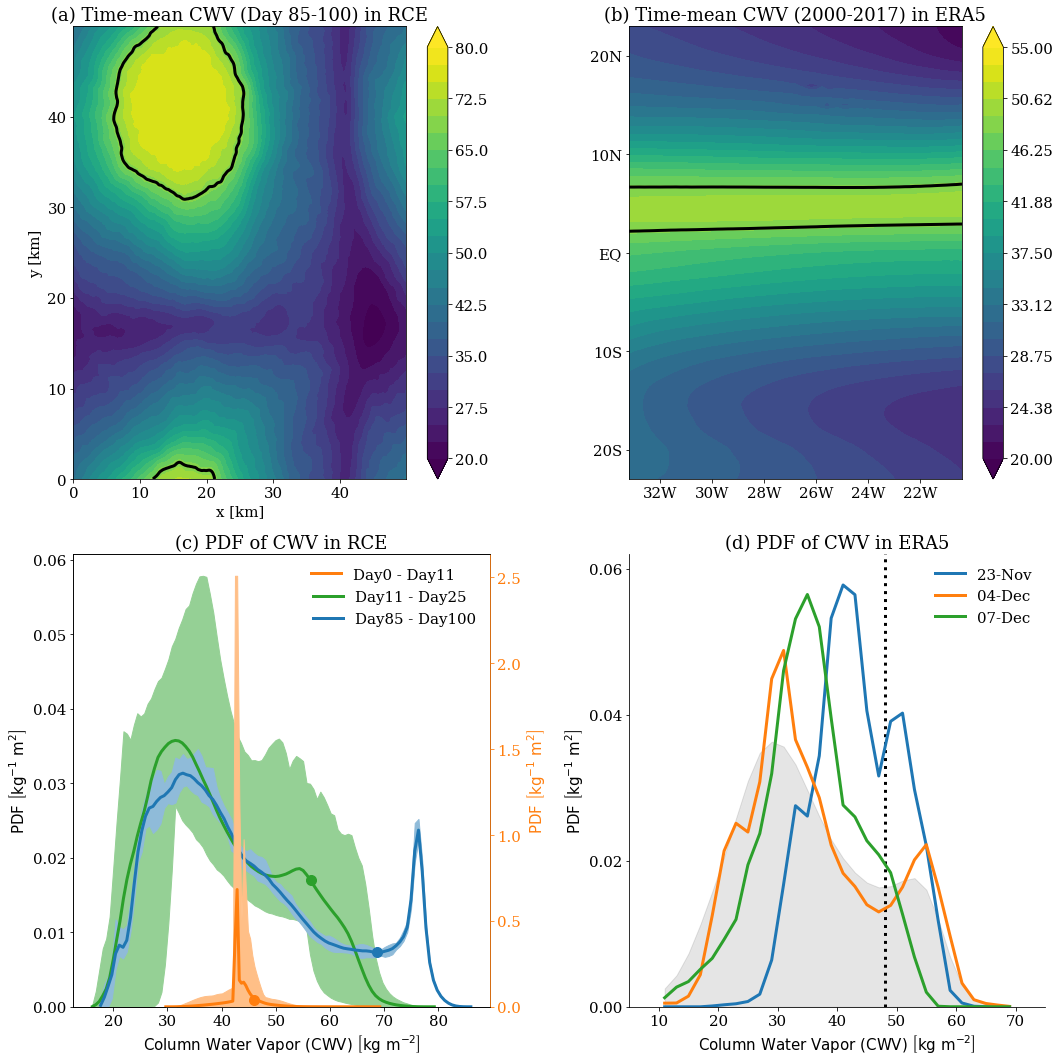

In [29]:
### Figure 1a
fig,ax0 = plt.subplots(2,2,figsize=(15,15))

ax = ax0[0][0]
ax.contour(F1a.x,F1a.y,F1a.toplot,[Cval],colors='k')
cont_levels = np.linspace(20,80,25)
im = ax.contourf(F1a.x, F1a.y, F1a.toplot, cont_levels, vmin = 20, vmax = 80, extend='both')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_title('(a) Time-mean CWV (Day 85-100) in RCE')
cbar = fig.colorbar(im,ax=ax)

### Figure 1c
ax = ax0[1][0]
ax2 = ax.twinx()

# Shading goes in the back
ax2.fill_between(edgTObin(F1c.SPINedges),F1c.SPIN_min,F1c.SPIN_max,color=1-(1-F1c.SPINrgb)/2)
ax.fill_between(edgTObin(F1c.COALedges),F1c.COAL_min,F1c.COAL_max,color=1-(1-F1c.COALrgb)/2)
ax.fill_between(edgTObin(F1c.COARedges),F1c.COAR_min,F1c.COAR_max,color=1-(1-F1c.COARrgb)/2)

# Right axis = Day 11-100
SPINline = ax2.plot(edgTObin(F1c.SPINedges),F1c.CWV_PDF_SPIN,color=F1c.SPINrgb,label='Day0 - Day11')
# Add dots to indicate mean value of percentile chosen for MMLi
# ax2.scatter(x=F1c.SPIN_P48_mean,y=np.interp(x=F1c.SPIN_P48_mean,xp=edgTObin(F1c.SPINedges),
#                                             fp=F1c.CWV_PDF_SPIN),color=F1c.SPINrgb)
ax2.scatter(x=P88.SPIN_p88[0],y=P88.SPIN_p88[1],color=F1c.SPINrgb)

ax2.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$',color=F1c.SPINrgb)
ax2.spines['right'].set_color(F1c.SPINrgb)
ax2.tick_params(axis='y', colors=F1c.SPINrgb)
ax2.set_ylim((0,ax2.get_ylim()[1]))
leg2 = ax2.legend(frameon=False,bbox_to_anchor=(0,0,0.95,1))

# Left axis = Day0-Day11
COALline = ax.plot(edgTObin(F1c.COALedges),F1c.CWV_PDF_COAL,color=F1c.COALrgb,label='Day11 - Day25')
COARline = ax.plot(edgTObin(F1c.COARedges),F1c.CWV_PDF_COAR,color=F1c.COARrgb,label='Day85 - Day100')
# Add dots to indicate mean value of percentile chosen for MMLi
# ax.scatter(x=F1c.COAL_P48_mean,y=np.interp(x=F1c.COAL_P48_mean,xp=edgTObin(F1c.COALedges),fp=F1c.CWV_PDF_COAL),color=F1c.COALrgb)
# ax.scatter(x=F1c.COAR_P48_mean,y=np.interp(x=F1c.COAR_P48_mean,xp=edgTObin(F1c.COARedges),fp=F1c.CWV_PDF_COAR),color=F1c.COARrgb)
ax.scatter(x=P88.COAL_p88[0],y=P88.COAL_p88[1],color=F1c.COALrgb)
ax.scatter(x=P88.COAR_p88[0],y=P88.COAR_p88[1],color=F1c.COARrgb)

leg = ax.legend(frameon=False,bbox_to_anchor=(0,0,1,0.95))
ax.set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ \left(CWV\right)\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$')
ax.set_ylim((0,ax.get_ylim()[1]))
ax.set_title('(c) PDF of CWV in RCE')

### Figure 1b
# Multi-year mean of CWV 
axes = ax0[0][1]

axes.contour(F1b.lon,F1b.lat,F1b.toplot, [48.00], colors=['k'])#, vmin = 2.7e9, vmax=2.85e9)
cont_levels = np.linspace(20,55,25)
im = axes.contourf(F1b.lon,F1b.lat,F1b.toplot, cont_levels, vmin = 20, vmax = 55, extend='both')

locs = axes.get_xticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    labels[i_l] = '%iW'%int(360-loc)
axes.set_xticklabels(labels) 

locs = axes.get_yticks()
labels = list(np.arange(len(locs)))
for i_l, loc in enumerate(locs):
    if loc >0:
        labels[i_l] = '%iN'%int(loc)
    elif loc == 0:
        labels[i_l] = 'EQ'
    else:
        labels[i_l] = '%iS'%int(loc*-1)
axes.set_yticklabels(labels)
axes.set_title('(b) Time-mean CWV (2000-2017) in ERA5')

cbar = fig.colorbar(im,ax=axes)

### Figure 1d

ax = ax0[1][1]
x = np.linspace(10,75,161)

for i, time in enumerate(F1d.times_A):

    tmp = np.squeeze(F1d.CWV.sel({'time':slice(time-np.timedelta64(12,'h'),
                                               time+np.timedelta64(12,'h'))}).values) #np.squeeze(PWAtl.sel({'time':time}).values) #
    
    if switch_kde:
        density = stats.gaussian_kde(np.ndarray.flatten(tmp))
        ax.plot(x, density(x), label = pd.to_datetime(time).strftime("%d-%b"), color = F1d.col_A[i])
    else:
        hist, edges = np.histogram(np.ndarray.flatten(tmp), density = True, bins = F1d.xbins)
        ax.plot(edgTObin(edges), hist, label = pd.to_datetime(time).strftime("%d-%b"), color = F1d.col_A[i])
    
    ax.legend(frameon=False)
    
ax.fill_between(edgTObin(F1d.edges),F1d.hist_total, color = 'k',label='85d-100d', alpha = 0.1)
    
ymin, ymax = plt.ylim()
ax.vlines([48], 0.0, ymax, linestyle=':')
ax.set_ylim(0.0, 0.062)
ax.set_yticks([0.0, 0.02, 0.04, 0.06])
ax.set_xlim(F1d.xbins[0]-5, F1d.xbins[-1]+5)

ax.set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ \left(CWV\right)\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_ylabel(r'$\mathrm{%s\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$'%method)
ax.set_title('(d) PDF of CWV in ERA5')

#ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
plt.tight_layout()

# Save figure
path_home = '/users/tbeucler/'
plt.draw()
plt.savefig(path_home+'Fig1.pdf',format='pdf')

# 2) Figure 2

In [14]:
# Load reduced data into dictionary S
path = pathPKL+'2020_01_08_COSMO_LFE.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F2a = Bunch(S)

In [15]:
path = pathPKL+'2020_01_08_ERA5_LFE.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F2b = Bunch(S)

2005-11-23T02:00:00.000000000 2005-11-24T02:00:00.000000000
2005-12-04T02:00:00.000000000 2005-12-05T02:00:00.000000000
2005-12-07T02:00:00.000000000 2005-12-08T02:00:00.000000000


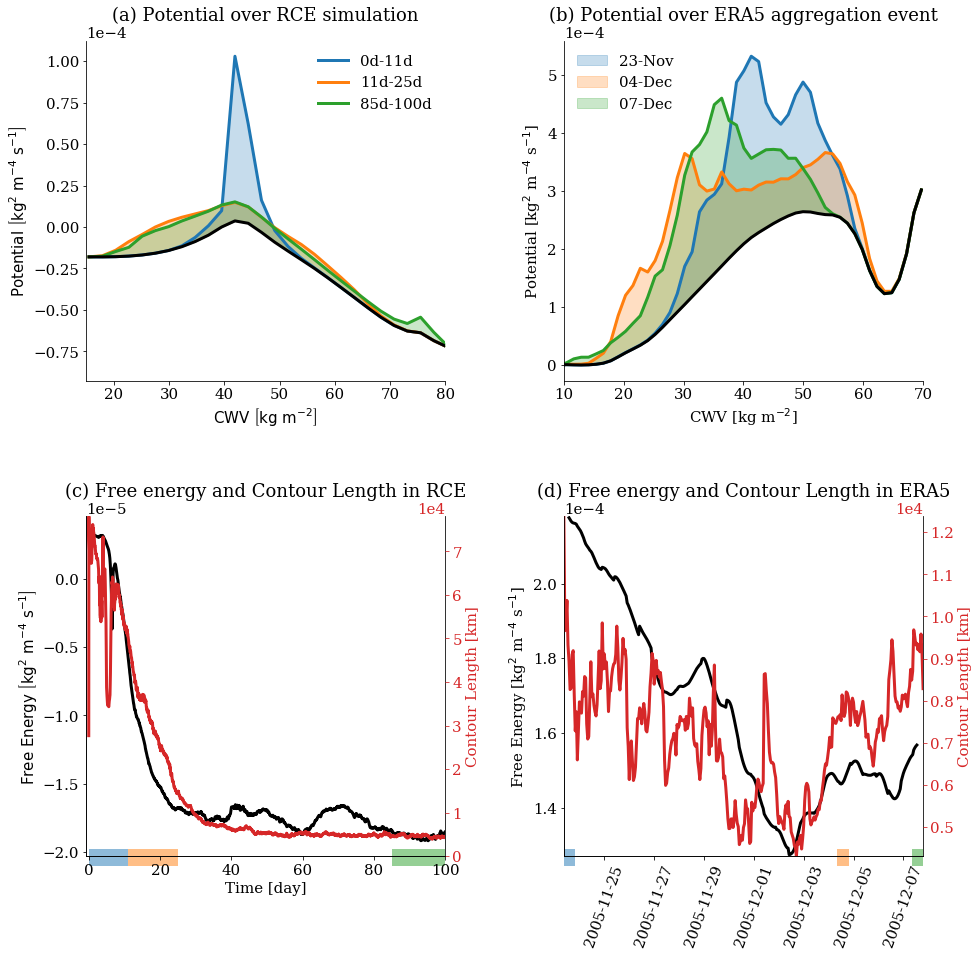

In [23]:
### Figure 2a,c
fig,ax0 = plt.subplots(2,2,figsize=(15,15))
plt.subplots_adjust(hspace=0.33,wspace=0.33)

### Figure 2a
ax = {}
ax[0] = ax0[0][0]
ax[0].set_xlim((15,80))
# ax[0].set_ylim((-1.5e8,1e9))
ax[0].set_xlabel(r'$\mathrm{CWV}\ \left[\mathrm{kg\ m^{-2}}\right]$')
ax[0].set_ylabel(r'$\mathrm{Potential\ \left[kg^{2}\ m^{-4}\ s^{-1}\right]}$')

ax[0].fill_between((edgTObin(F2a.SPINedges)),F2a.V,F2a.V+F2a.CWV_PDF_SPIN*5e-4,color=F2a.col_A[0], alpha = 0.25)
ax[0].fill_between((edgTObin(F2a.COALedges)),F2a.V,F2a.V+F2a.CWV_PDF_COAL*5e-4,color=F2a.col_A[1], alpha = 0.25)
ax[0].fill_between((edgTObin(F2a.COARedges)),F2a.V,F2a.V+F2a.CWV_PDF_COAR*5e-4,color=F2a.col_A[2], alpha = 0.25)


ax[0].plot((edgTObin(F2a.SPINedges)),F2a.V+F2a.CWV_PDF_SPIN*5e-4,color=F2a.col_A[0],label='0d-11d')
ax[0].plot((edgTObin(F2a.COALedges)),F2a.V+F2a.CWV_PDF_COAL*5e-4,color=F2a.col_A[1],label='11d-25d')
ax[0].plot((edgTObin(F2a.COARedges)),F2a.V+F2a.CWV_PDF_COAR*5e-4,color=F2a.col_A[2],label='85d-100d')
ax[0].legend(frameon=False,loc='upper right')

ax[0].plot(F2a.binm,F2a.V,color='k')
ax[0].set_title('(a) Potential over RCE simulation',pad=20)

### Figure 2c
ax[1] = ax0[1][0]
axbis = ax[1].twinx()
axbis.plot(F2a.tcoor/(24*3600),F2a.CL/1e3,color='C3')

ymin_C, ymax_C = 0, np.max(F2a.CL)/1e3

axbis.spines['right'].set_color('C3')
axbis.tick_params(axis='y', colors='C3')
axbis.set_ylim((ymin_C, ymax_C))
axbis.set_ylabel('Contour Length [km]',color='C3')

ax[0].spines['top'].set_visible(False)
axbis.spines['top'].set_visible(False)

ax[0].spines['right'].set_visible(False)
axbis.spines['right'].set_visible(False)

ax[1].plot(F2a.tcoor/(24*3600),F2a.Ffinal_RCE,color='k')
ymin_F, ymax_F = ax[1].get_ylim()

# From https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html
trans = mtransforms.blended_transform_factory(ax[1].transData, ax[1].transAxes)
period_y_max, period_y_min = -0.03, 0.02

ax[1].fill_between(x=F2a.tcoor/(24*3600),y1=period_y_min,y2=period_y_max,
                   where=(F2a.tcoor/(24*3600)<=11)&(F2a.tcoor/(24*3600)>=0),
                   facecolor=F2a.col_A[0],alpha=0.5,transform=trans, clip_on=False)
ax[1].fill_between(x=F2a.tcoor/(24*3600),y1=period_y_min,y2=period_y_max,
                   where=(F2a.tcoor/(24*3600)<=25)&(F2a.tcoor/(24*3600)>=11),
                   facecolor=F2a.col_A[1],alpha=0.5,transform=trans, clip_on=False)
ax[1].fill_between(x=F2a.tcoor/(24*3600),y1=period_y_min,y2=period_y_max,
                   where=(F2a.tcoor/(24*3600)<=100)&(F2a.tcoor/(24*3600)>=85),
                   facecolor=F2a.col_A[2],alpha=0.5,transform=trans, clip_on=False)

ax[1].set_xlim((-0.75,100))
ax[1].set_ylim((ymin_F, ymax_F))
ax[1].set_xlabel('Time [day]')
ax[1].set_ylabel(r'$\mathrm{Free\ Energy\ \left[kg^{2}\ m^{-4}\ s^{-1}\right]}$')

ax[0].ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
ax[1].ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
axbis.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')

ax[1].spines['top'].set_visible(False)
axbis.spines['top'].set_visible(False)

ax[1].set_title('(c) Free energy and Contour Length in RCE',pad=20)

### Figure 2b,d
option = 'Agg' # Aggregating, potential averaged from imin_left to imax
option = 'Dis' # Disaggregating, potential averaged from imax to imin_right

### Figure 2b
ax = {}
ax[0] = ax0[0][1]

ax[0].set_xlabel(r'CWV [kg m$^{-2}$]')
ax[0].set_ylabel(r'Potential [kg$^{2}$ m$^{-4}$ s$^{-1}$]')

ax[0].set_xlim(10,70)

for i, time_lab in enumerate(F2b.times_labels):
    ax[0].fill_between(F2b.binm_Vfinal, F2b.Vfinal, F2b.Vfinal+F2b.dic_hist[time_lab]*5e-3,
                       color=F2b.col_A[i],label=time_lab, alpha = 0.25)
    ax[0].plot(F2b.binm_Vfinal, F2b.Vfinal+F2b.dic_hist[time_lab]*5e-3,
               color=F2b.col_A[i])
    
ax[0].plot(F2b.binm_Vfinal, F2b.Vfinal,color='k')

ax[0].legend(frameon=False)

time_period = F2b.time_A[np.where((F2b.time_A>F2b.times_A[0]-np.timedelta64(6,'h'))&\
                              (F2b.time_A<F2b.times_A[-1]+np.timedelta64(6,'h')))]
cont_period = F2b.cont_t[np.where((F2b.time_A>F2b.times_A[0]-np.timedelta64(6,'h'))&\
                              (F2b.time_A<F2b.times_A[-1]+np.timedelta64(6,'h')))]
ax[0].set_title('(b) Potential over ERA5 aggregation event',pad=20)

### Figure 2d
ax[1] = ax0[1][1]
axbis = ax[1].twinx()
axbis.plot(F2b.time_period, F2b.cont_period,color='C3')
#axbis.plot(time_period, gaussian_filter1d(cont_period, sigma=12), 'C3:')
axbis.spines['right'].set_color('C3')
axbis.tick_params(axis='y', colors='C3')

axbis.set_ylabel('Contour Length [km]',color='C3')

ax[0].spines['top'].set_visible(False)
axbis.spines['top'].set_visible(False)

ax[0].spines['right'].set_visible(False)
axbis.spines['right'].set_visible(False)

ax[1].plot(F2b.LFE_time, F2b.Ffinal,color='k')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=70 )

ymin_C, ymax_C = 4.301e3, 1.2377e4
axbis.set_ylim(ymin_C, ymax_C)

# From https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html
trans = mtransforms.blended_transform_factory(ax[1].transData, ax[1].transAxes)
period_y_max, period_y_min = -0.03, 0.02

for i, time in enumerate(F2b.times_A):

    print(time-np.timedelta64(12,'h'), time+np.timedelta64(12,'h'))
    ax[1].fill_between(x=F2b.time_period,y1=period_y_min,y2=period_y_max,
                       where=(F2b.time_period<=(time+np.timedelta64(6,'h')))&\
                       (F2b.time_period>=(time-np.timedelta64(6,'h'))),
                       facecolor=F2b.col_A[i],alpha=0.5,transform=trans, clip_on = False)
    
    #print(len(np.where(((time_period>=(time-np.timedelta64(6,'h')))&(time_period<=(time+np.timedelta64(6,'h')))))[0]))

ax[1].set_xlim((F2b.time_period.min(),F2b.time_period.max()))
#ymin_F, ymax_F = 3.5e-4, 5.2e-4 #ax[1].get_ylim() # For aggregation on Dec2
ymin_F, ymax_F = 1.27e-4, 2.18e-4 #ax[1].get_ylim() # For aggregation on Dec4
ax[1].set_ylim((ymin_F, ymax_F))
ax[1].set_ylabel(r'Free Energy [kg$^{2}$ m$^{-4}$ s$^{-1}$]')

ax[0].ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
ax[1].ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
axbis.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')

plt.subplots_adjust(hspace = 0.4)

ax[1].spines['top'].set_visible(False)
axbis.spines['top'].set_visible(False)
ax[1].set_title('(d) Free energy and Contour Length in ERA5',pad=20)

# Save figure
path_home = '/users/tbeucler/'
plt.draw()
plt.savefig(path_home+'Fig2.pdf',format='pdf')